 # Example of Supervised Learning with k-N; Fruit Classfication


In [282]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import cm


 ### Load Dataset to train the system


In [283]:
fruits = pd.read_table('../data/fruit_data_with_colors.txt')

#### Create a mapping from fruit label value to fruit name to make results easier to interpret

In [284]:
# color_score: 1-> Red, 0-> Violet
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))
print (lookup_fruit_name)

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}


#### Print dataset

In [285]:
# color_score: 1-> Red, 0-> Violet
print (fruits)

    fruit_label fruit_name     fruit_subtype  mass  width  height  color_score
0             1      apple      granny_smith   192    8.4     7.3         0.55
1             1      apple      granny_smith   180    8.0     6.8         0.59
2             1      apple      granny_smith   176    7.4     7.2         0.60
3             2   mandarin          mandarin    86    6.2     4.7         0.80
4             2   mandarin          mandarin    84    6.0     4.6         0.79
5             2   mandarin          mandarin    80    5.8     4.3         0.77
6             2   mandarin          mandarin    80    5.9     4.3         0.81
7             2   mandarin          mandarin    76    5.8     4.0         0.81
8             1      apple          braeburn   178    7.1     7.8         0.92
9             1      apple          braeburn   172    7.4     7.0         0.89
10            1      apple          braeburn   166    6.9     7.3         0.93
11            1      apple          braeburn   172  

 ## Create Train and Test Datasets


 ### Define features X and labels y
 ### For this example, we use the mass, width, and height features (X) of each fruit instance (y)


In [286]:
X = fruits[['mass', 'width', 'height','color_score']]
y = fruits['fruit_label']

 ### Train dataset and Test dataset test split, using default 75% / 25%


In [287]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
from sklearn.preprocessing import MinMaxScaler

### Train dataset 3D scatter plot
### * Suppose density constant = water for all fruits -> mass, width and  height are related m=d*V-> subs mass by color_score

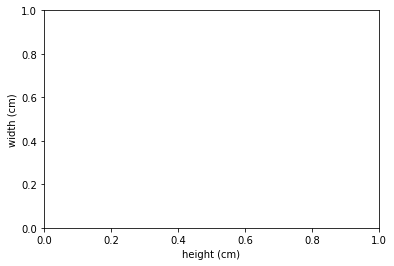

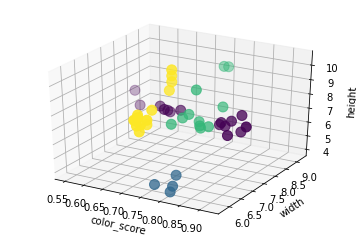

In [288]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_train['color_score'], X_train['width'], X_train['height'], c = y_train, marker = 'o', s=100)
ax.set_xlabel('color_score')
ax.set_ylabel('width')
ax.set_zlabel('height')
plt.show()


## Configure, train and test ML algorithm, K-Nearest

### Create classifier K-N object

In [289]:
knn = KNeighborsClassifier(n_neighbors = 1)

### Train the classifier, (fit the estimator) using the training dataset

In [290]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

### Test the classfier, estimate the accuracy of the classifier on future data, using the test dataset

In [291]:
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = knn.predict(X_test)
print "Confusion matrix:"
print(confusion_matrix(y_test, pred))

Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 0.60
Confusion matrix:
[[2 0 2 0]
 [0 1 0 0]
 [3 0 5 0]
 [0 0 1 1]]


## Classify new unseen data

### First example: a small fruit with mass 90g, width 4.3 cm, height 5.5 cm, color_score=0.70

In [292]:
fruit_prediction = knn.predict([[90, 4.3, 5.5, 0.79]])
lookup_fruit_name[fruit_prediction[0]]
print "Prediction for mass=90, width=4.3, height=5.5, color_score=0.79: ==> " + str (lookup_fruit_name[fruit_prediction[0]])


Prediction for mass=90, width=4.3, height=5.5, color_score=0.79: ==> mandarin


### Second example: a larger, elongated fruit with mass 150g, width 7.3 cm, height 7.5 cm, color_score=0.63

In [293]:
fruit_prediction = knn.predict([[150, 7.3, 7.5, 0.63]])
lookup_fruit_name[fruit_prediction[0]]
print "Prediction for mass=150, width=7.3, height=7.5, color_score=0.63: ==> " + str (lookup_fruit_name[fruit_prediction[0]])

Prediction for mass=150, width=7.3, height=7.5, color_score=0.63: ==> apple


## Tune k-N algorithm

### How sensitive is k-N classification accuracy to the choice of the 'k' parameter?

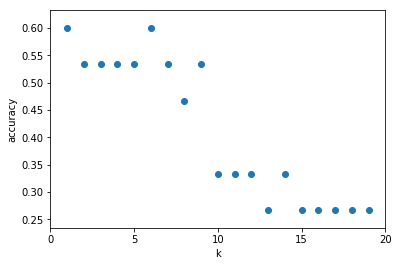

In [294]:
k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);
plt.show()

### How sensitive is k-N classification accuracy to the train/test split proportion?

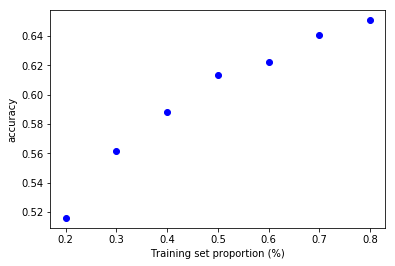

In [295]:
t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

knn = KNeighborsClassifier(n_neighbors = 1)

plt.figure()

for s in t:

    scores = []
    for i in range(1,1000):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1-s)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))
    plt.plot(s, np.mean(scores), 'bo')

plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy');
plt.show()
